In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
food_loss_data = "Resources/FAO_Food_Loss.csv"
gdp_values = "Resources/GDP_data.csv"

In [3]:
food_loss_df = pd.read_csv(food_loss_data)
gdp_df = pd.read_csv(gdp_values)
food_loss_df = pd.DataFrame(food_loss_df)
food_loss_df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,...,notes,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,...,Reference has been generated automatically,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# filter out the empty columns
food_loss_clean = food_loss_df[["m49_code", "country", "region", "commodity", "year", "loss_percentage", "loss_percentage_original", "loss_quantity", "activity1", "activity2", "food_supply_stage", "treatment", "cause_of_loss"]]
food_loss_clean.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents


In [5]:
# Check number of rows per country
count_per_country = food_loss_clean.groupby("country")
count_per_country.count()

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
Africa,1,0,1,1,1,1,0,0,0,1,0,0
Algeria,2,0,2,2,2,2,0,0,0,2,0,0
Angola,726,0,726,726,726,726,0,726,220,616,0,0
Argentina,14,0,14,14,14,14,13,13,0,14,13,0
Armenia,38,0,38,38,38,38,0,20,8,38,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,16,0,16,16,16,16,8,11,3,15,11,0
Western Africa,4,0,4,4,4,4,0,4,0,4,0,0
Western Asia,5,0,5,5,5,5,0,5,2,5,0,0


In [6]:
# figure out which countries have the most data
count_per_country_sorted = count_per_country.count().sort_values(by="m49_code", ascending=False)
count_per_country_sorted.head(20)

,m49_code,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
country,,,,,,,,,,,,
United States of America,3094,0,3094,3094,3094,3094,13,191,96,3094,90,6
India,1354,140,1354,1354,1354,1354,111,1062,133,1351,46,136
Ethiopia,1064,27,1064,1064,1064,1064,8,1002,290,933,83,28
Kenya,1054,77,1054,1054,1054,1054,11,998,269,917,146,108
Uganda,866,31,866,866,866,866,7,851,279,734,8,18
Ghana,817,99,817,817,817,817,6,724,332,729,100,103
Malawi,803,14,803,803,803,803,9,747,223,693,29,18
Senegal,799,23,799,799,799,799,1,748,220,689,0,40
Zambia,772,5,772,772,772,772,1,762,220,684,4,8


In [7]:
# create df with our 15 African countries of choice
countries_list = ["Ethiopia", "Kenya", "Uganda", "Malawi", "Senegal", "Zambia", "Burkina Faso", "Angola", "Benin", "Mali", "United Republic of Tanzania", "Mozambique", "Rwanda", "Nigeria"]
african_data = food_loss_clean[food_loss_clean['country'].isin(countries_list)]
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [8]:
# rename/ re-characterize some rows

african_data.loc[african_data["activity1"] == "Storage", "food_supply_stage"] = "Storage"
african_data.loc[african_data["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
african_data.loc[african_data["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
african_data.loc[african_data["activity1"] == "Drying", "food_supply_stage"] = "Farm"
african_data.loc[african_data["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [9]:
# isolate blank rows for food_supply_stage and activity1
blank_rows = african_data[african_data['food_supply_stage'].isnull() | (african_data['food_supply_stage'] == '') & (african_data['activity1'].isnull())]
blank_rows.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2903,204,Benin,NaN,Maize (corn),2000,17.80,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN
9729,404,Kenya,NaN,Maize (corn),2012,15.15,9.7-20.6,NaN,NaN,NaN,NaN,NaN,NaN
10039,404,Kenya,NaN,Maize (corn),2006,5.75,3.9-7.6,NaN,NaN,NaN,NaN,NaN,NaN
10040,404,Kenya,NaN,Maize (corn),2006,24.20,19.3-29.1,NaN,NaN,NaN,NaN,NaN,NaN
10117,404,Kenya,NaN,Maize (corn),2004,14.25,13.5-15,NaN,NaN,NaN,NaN,NaN,Insects; Maize Stem Borer


In [10]:
# display african_data without blank rows for food_supply_stage
african_data = african_data.drop(blank_rows.index)
african_data.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
2245,204,Benin,NaN,Rice,2022,4.70,4.70%,NaN,Threshing,NaN,Farm,Manual threshing,NaN
2246,204,Benin,NaN,Rice,2022,3.42,3.42%,NaN,Storage,NaN,Storage,Paddy and milled rice,NaN
2247,204,Benin,NaN,Rice,2022,10.97,10.97%,NaN,Harvesting,NaN,Harvest,Manual harvesting,NaN
2248,204,Benin,NaN,Rice,2022,2.80,2.80%,NaN,Harvesting,NaN,Harvest,Harvesting with manual per panicle,NaN
2249,204,Benin,NaN,Rice,2022,1.09,1.09%,NaN,Winnowing,NaN,Farm,NaN,NaN


In [11]:
# find average of loss percentage for each supply stage and rank the results

amount_of_waste = african_data.groupby("food_supply_stage")["loss_percentage"].mean()
amount_of_waste_sorted = amount_of_waste.sort_values(ascending=False)
amount_of_waste_sorted = pd.DataFrame(amount_of_waste_sorted)
amount_of_waste_sorted.head()

,loss_percentage
food_supply_stage,
Export,25.750000
Retail,18.872182
Post-harvest,18.084444
Wholesale,15.080364
Whole supply chain,13.768627


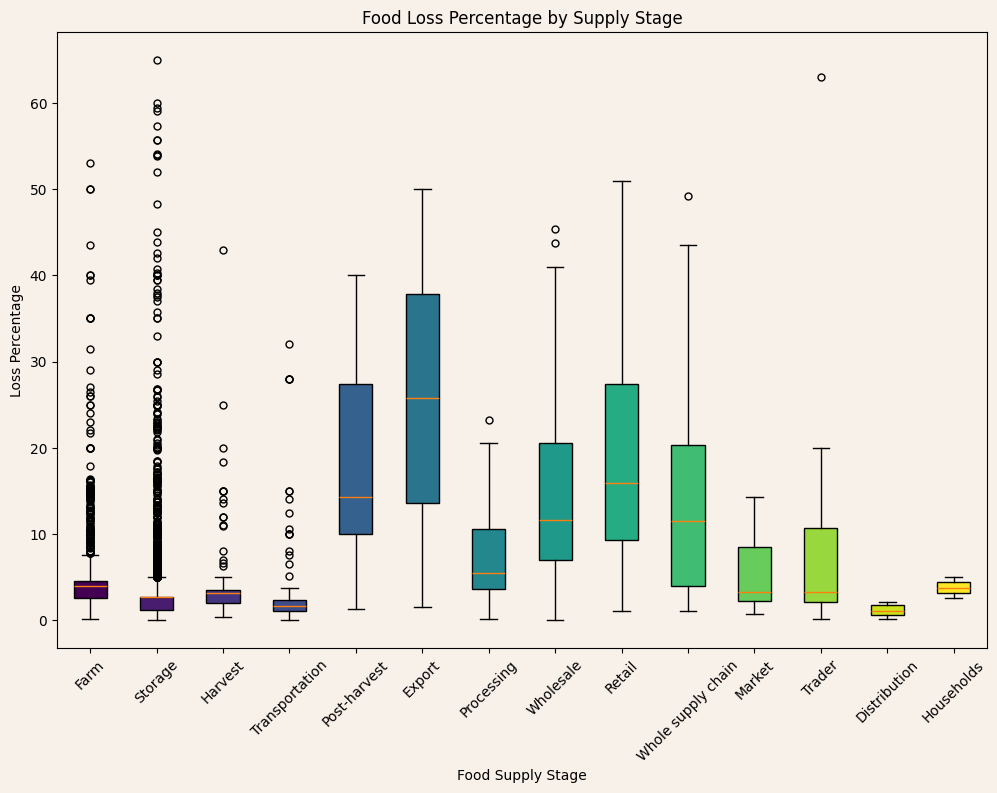

In [12]:
# Create a box plot for food loss percentage by supply stage

plt.figure(figsize=(12, 8))
flierprops = dict(marker='o', markersize=5, linestyle='none')
box_data = [african_data[african_data['food_supply_stage'] == stage]['loss_percentage'] for stage in african_data['food_supply_stage'].unique()]
boxplot = plt.boxplot(box_data, tick_labels=african_data['food_supply_stage'].unique(), patch_artist=True, showfliers=True, flierprops = flierprops)
# Color code each boxplot with a different color
colors = plt.cm.viridis(np.linspace(0, 1, len(box_data)))  # Generate a list of colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
# Customize the plot
plt.title('Food Loss Percentage by Supply Stage')
plt.xlabel('Food Supply Stage')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/africa_box_plot.png")

plt.show()

In [13]:
commodity_wasted = african_data.groupby("commodity")["loss_percentage"].mean()
commodity_wasted_sorted = commodity_wasted.sort_values(ascending=False)

In [14]:
waste_by_year = african_data.groupby("year")["loss_percentage"].mean()
waste_by_year_sorted = waste_by_year.sort_values(ascending=False)

In [15]:
# create a simple dataframe for waste by year
waste_by_year = pd.DataFrame(waste_by_year)
waste_by_year.reset_index(inplace=True)
waste_by_year.head()

,year,loss_percentage
0,1968,5.4000
1,1969,14.2500
2,1970,18.5000
3,1973,14.2500
4,1974,18.8525


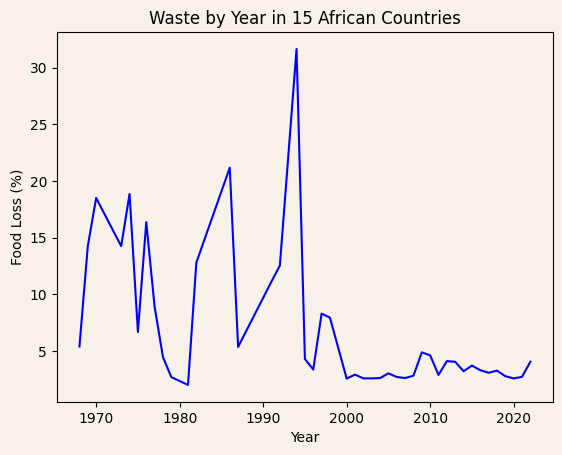

In [16]:
x_axis = waste_by_year["year"]
y_axis = waste_by_year["loss_percentage"]
plt.plot(x_axis, y_axis, color = 'b')
plt.title("Waste by Year in 15 African Countries")
plt.xlabel("Year")
plt.ylabel("Food Loss (%)")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/africa_over_time.png")

plt.show()

In [17]:
# add simplified stages column to the african_data df
african_data["Simplified Supply Stage"] = ''
african_data.loc[african_data["food_supply_stage"] == "Farm", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Pre-harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Post-harvest", "Simplified Supply Stage"] = "Farm Stage"
african_data.loc[african_data["food_supply_stage"] == "Storage", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Packing", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Stacking", "Simplified Supply Stage"] = "Storage Stage"
african_data.loc[african_data["food_supply_stage"] == "Transportation", "Simplified Supply Stage"] = "Transport Stage"
african_data.loc[african_data["food_supply_stage"] == "Distribution", "Simplified Supply Stage"] = "Transport Stage"
african_data.loc[african_data["food_supply_stage"] == "Export", "Simplified Supply Stage"] = "Export Stage"
african_data.loc[african_data["food_supply_stage"] == "Trader", "Simplified Supply Stage"] = "Export Stage"
african_data.loc[african_data["food_supply_stage"] == "Wholesale", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Market", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Processing", "Simplified Supply Stage"] = "Wholesale Stage"
african_data.loc[african_data["food_supply_stage"] == "Retail", "Simplified Supply Stage"] = "Retail Stage"
african_data.loc[african_data["food_supply_stage"] == "Food Services", "Simplified Supply Stage"] = "Retail Stage"
african_data.loc[african_data["food_supply_stage"] == "Households", "Simplified Supply Stage"] = "Household Stage"
african_data.loc[african_data["food_supply_stage"] == "Whole supply chain", "Simplified Supply Stage"] = "Whole Supply Chain"

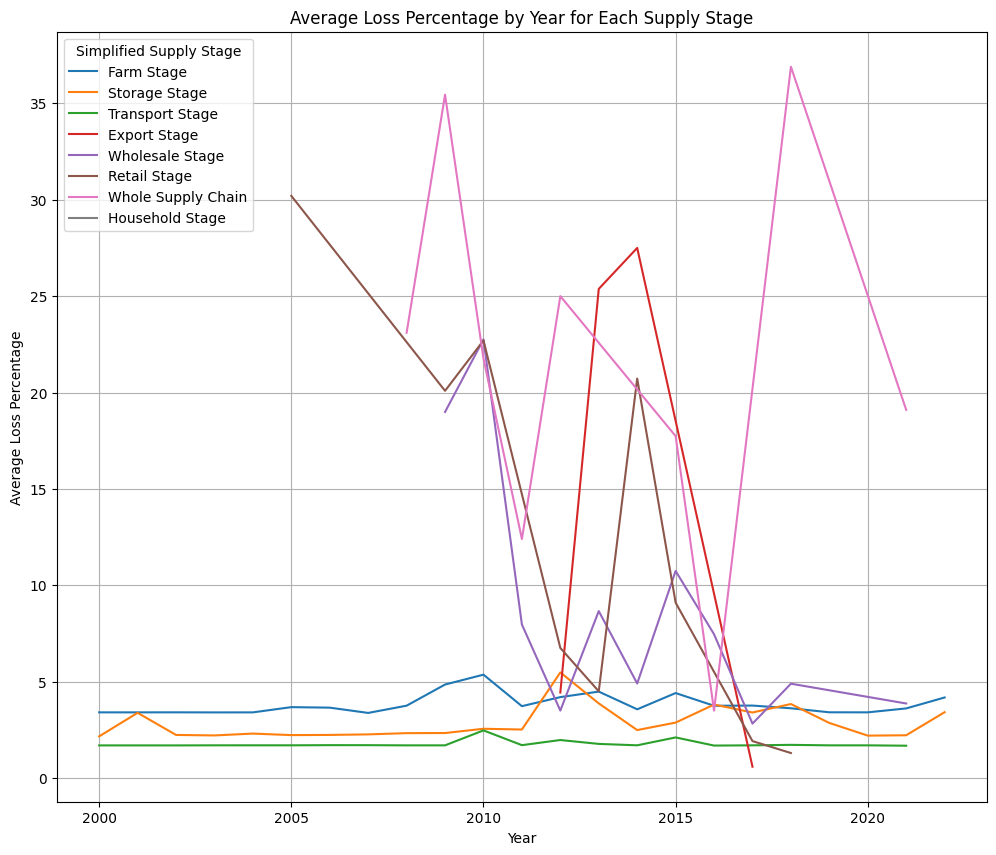

In [18]:
# create line plots over time but split them up by supply stage
african_data = african_data[african_data['year'] >= 2000]

#Group by year and Simplified Supply Stage, then calculate the mean of loss_percentage
grouped_df = african_data.groupby(["year", "Simplified Supply Stage"])["loss_percentage"].mean().reset_index()

# Get the unique stages
stages = african_data["Simplified Supply Stage"].unique()

# Plotting
plt.figure(figsize=(12, 10))

# Loop through each stage and plot
for stage in stages:
    stage_data = grouped_df[grouped_df["Simplified Supply Stage"] == stage]
    plt.plot(stage_data["year"], stage_data["loss_percentage"], label=stage)

# Adding title and labels
plt.title('Average Loss Percentage by Year for Each Supply Stage')
plt.xlabel('Year')
plt.ylabel('Average Loss Percentage')
plt.legend(title='Simplified Supply Stage')
plt.grid(True)

# Save the figure
plt.savefig("Visualizations/africa_over_time_stages.png")

# Show the plot
plt.show() 

In [19]:
# create df for GDP data
gdp_df = pd.DataFrame(gdp_df)
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264110,28419.264530,28449.712950,29329.081750,30918.483580,31902.809820,24008.127820,29127.759380,33300.838820,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342518,166.263682,171.961916,182.018480,192.639989,202.847824,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130070,139.291222,148.821355,156.314136,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


In [20]:
# make a new dataframe for 2021 gdp
gdp_2021 = gdp_df[["Country Name", "2021"]]
gdp_2021 = pd.DataFrame(gdp_2021)
gdp_2021.head()

,Country Name,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [21]:
# rename "Country Name" to "country" for easy merging
gdp_2021.rename(columns={'Country Name': 'country'}, inplace=True)
gdp_2021.head()

,country,2021
0,Aruba,29127.759380
1,Africa Eastern and Southern,1545.956697
2,Afghanistan,355.777826
3,Africa Western and Central,1769.171853
4,Angola,1927.474078


In [22]:
# find average loss by country
food_loss_recent = food_loss_clean[food_loss_clean['year'] >= 2011]
average_recent = food_loss_recent.groupby("country")["loss_percentage"].mean()
average_by_country = food_loss_clean.groupby("country")["loss_percentage"].mean()
average_recent

country
Angola                                 2.514557
Argentina                              0.503077
Armenia                                5.050000
Australia                             18.402326
Australia and New Zealand             42.000000
                                        ...    
Venezuela (Bolivarian Republic of)    37.000000
Viet Nam                               9.425000
Western Asia                          14.800000
Zambia                                 2.479753
Zimbabwe                               3.264272
Name: loss_percentage, Length: 116, dtype: float64

In [23]:
# create a dataframe for average loss by country
average_loss_df = { "country": food_loss_clean["country"].unique(), "average_loss": average_by_country}
average_recent_df = { "country": food_loss_recent["country"].unique(), "average_loss": average_recent}
average_loss_df = pd.DataFrame(average_loss_df)
average_recent_df = pd.DataFrame(average_recent_df)
average_loss_df.reset_index(drop=True, inplace=True)
average_recent_df.reset_index(drop=True, inplace=True)
average_recent_df

,country,average_loss
0,Myanmar,2.514557
1,Burundi,0.503077
2,Cambodia,5.050000
3,Cameroon,18.402326
4,Canada,42.000000
...,...,...
111,United Republic of Tanzania,37.000000
112,United States of America,9.425000
113,Burkina Faso,14.800000
114,Venezuela (Bolivarian Republic of),2.479753


In [24]:
# create a dataframe combining the first dataset with 2021 gdp
average_with_gdp = pd.merge(average_loss_df, gdp_2021, on="country")
average_recent_gdp = pd.merge(average_recent_df, gdp_2021, on="country")
average_recent_gdp

,country,average_loss,2021
0,Myanmar,2.514557,1233.227770
1,Burundi,0.503077,221.157803
2,Cambodia,5.050000,1625.235021
3,Cameroon,18.402326,1654.257037
4,Canada,42.000000,52496.844170
...,...,...,...
85,Tunisia,6.500000,3817.377174
86,Uganda,10.811413,883.892026
87,Ukraine,6.172656,4827.845703
88,Burkina Faso,14.800000,888.803611


In [25]:
# re-use our bins from before to designate classes
size_bins = [0, 1000, 5000, 15000, 50000, 150000]
labels = ["Low Income", "Lower Middle", "Middle", "Upper Middle", "High Income"]
average_with_gdp["GDP Class"] = pd.cut(average_with_gdp["2021"], 
                                    size_bins, labels=labels, include_lowest = True)
average_recent_gdp["GDP Class"] = pd.cut(average_recent_gdp["2021"], 
                                    size_bins, labels=labels, include_lowest = True)
average_recent_gdp.head()
average_with_gdp.head()


,country,average_loss,2021,GDP Class
0,Myanmar,30.000000,1233.227770,Lower Middle
1,Burundi,17.500000,221.157803,Low Income
2,Cambodia,1.038571,1625.235021,Lower Middle
3,Algeria,11.368421,4216.251285,Lower Middle
4,Cameroon,18.402326,1654.257037,Lower Middle


In [26]:
# create a dataframe for average loss by income class
average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()
average_recent_stats = average_recent_gdp.groupby("GDP Class")["average_loss"].mean()
average_loss_df = pd.DataFrame({"Average Loss by Class" : average_loss_stats})
average_recent_df = pd.DataFrame({"Average Loss by Class" : average_recent_stats})
average_loss_df.head()

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_56533/1469004866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_loss_stats = average_with_gdp.groupby("GDP Class")["average_loss"].mean()
/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_56533/1469004866.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_recent_stats = average_recent_gdp.groupby("GDP Class")["average_loss"].mean()


,Average Loss by Class
GDP Class,
Low Income,8.794127
Lower Middle,9.396455
Middle,12.318256
Upper Middle,8.042649
High Income,15.390491


In [27]:
# # create a bar graph for average loss by income class
average_loss_df.plot(kind = "bar", colormap = 'viridis', figsize = (6, 5), ylabel = "Average Loss (%)", title = "Average Food Waste by Income Class (2021)")
plt.xticks(rotation=45)

# Save the figure
plt.savefig("Visualizations/loss_by_class_all_years.png")

plt.show()
plt.tight_layout()

In [28]:
# create a bar graph for average loss by income class

# Define a color palette
# color_palette = plt.cm.get_cmap('viridis', len(average_recent_df['GDP_class'].unique()))
# # Create a bar graph for average loss by income class fig, 
# ax = plt.subplots(figsize=(6, 5)) 
# bars = ax.bar(average_recent_df['GDP_class'], average_recent_df['Average_Loss'], color=color_palette.colors)
# # Set labels and title 
# ax.set_ylabel("Average Loss (%)") 
# ax.set_title("Average Food Waste by Income Class (2011- 2021)")
# Rotate x-axis labels 
# Show the plot plt.show() plt.tight_layout()
average_recent_df.plot(kind = "bar", colormap = 'viridis', figsize = (6, 5), xlabel = "GDP Class", ylabel = "Average Loss (%)", title = "Average Food Waste by Income Class (2011- 2021)")
plt.xticks(rotation=45)

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/loss_by_class_2011-2021.png")

plt.show()
plt.tight_layout()

In [29]:
# merge full food loss dataframe with 2021 gdp data
clean_with_gdp = pd.merge(food_loss_clean, average_with_gdp, on="country")
clean_with_gdp.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle


In [30]:
# rename/ re-characterize some rows

clean_with_gdp.loc[clean_with_gdp["activity1"] == "Storage", "food_supply_stage"] = "Storage"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Transportation", "food_supply_stage"] = "Transportation"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Shelling", "food_supply_stage"] = "Harvest"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Transport", "food_supply_stage"] = "Transportation"
clean_with_gdp.loc[clean_with_gdp["activity1"] == "Drying", "food_supply_stage"] = "Farm"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Collector", "food_supply_stage"] = "Harvest"

In [31]:
new_blank_rows = clean_with_gdp[clean_with_gdp['food_supply_stage'].isnull() | (clean_with_gdp['food_supply_stage'] == '') & (clean_with_gdp['activity1'].isnull())]
new_blank_rows.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
1716,156,China,NaN,Rice,1997,14.0,5.0-23,NaN,NaN,NaN,NaN,NaN,Excluding Processing Losses,12.346341,12617.505100,Middle
2451,204,Benin,NaN,Maize (corn),2000,17.8,2.1-33.5,NaN,NaN,NaN,NaN,NaN,NaN,2.719588,1360.911474,Lower Middle
2539,214,Dominican Republic,NaN,Tomatoes,1977,14.8,14.8,NaN,NaN,NaN,NaN,NaN,NaN,11.754000,8476.749639,Middle
2540,214,Dominican Republic,NaN,Potatoes,1977,14.2,14.2,NaN,NaN,NaN,NaN,NaN,NaN,11.754000,8476.749639,Middle
2554,218,Ecuador,NaN,Maize (corn),2013,20.0,10.0-30,NaN,NaN,NaN,NaN,NaN,NaN,15.169130,6036.447274,Middle


In [32]:
clean_with_gdp = clean_with_gdp.drop(new_blank_rows.index)
clean_with_gdp.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle


In [33]:
# create a new column to add simplified supply stages
# farm stage: farm, pre-harvest, harvest, post-harvest
# storage stage: storage, packing, stacking
# transport stage: transportation, distribution
# export stage: export, trader
# wholesale stage: wholesale, market, processing
# retail stage: retail, food services
# household stage: households
# whole supply chain is its own category
clean_with_gdp["Simplified Supply Stage"] = ''
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Farm", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Pre-harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Post-harvest", "Simplified Supply Stage"] = "Farm Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Storage", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Packing", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Stacking", "Simplified Supply Stage"] = "Storage Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Transportation", "Simplified Supply Stage"] = "Transport Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Distribution", "Simplified Supply Stage"] = "Transport Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Export", "Simplified Supply Stage"] = "Export Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Trader", "Simplified Supply Stage"] = "Export Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Wholesale", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Market", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Processing", "Simplified Supply Stage"] = "Wholesale Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Retail", "Simplified Supply Stage"] = "Retail Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Food Services", "Simplified Supply Stage"] = "Retail Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Households", "Simplified Supply Stage"] = "Household Stage"
clean_with_gdp.loc[clean_with_gdp["food_supply_stage"] == "Whole supply chain", "Simplified Supply Stage"] = "Whole Supply Chain"
clean_with_gdp.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss,average_loss,2021,GDP Class,Simplified Supply Stage
0,104,Myanmar,NaN,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,NaN,Storage,"30 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
1,104,Myanmar,NaN,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,NaN,Storage,"60 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
2,104,Myanmar,NaN,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,NaN,Storage,"30 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
3,104,Myanmar,NaN,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,NaN,Storage,"60 days storage, with trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage
4,104,Myanmar,NaN,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,NaN,Storage,"90 days storage, no trapping",Rodents,30.0,1233.22777,Lower Middle,Storage Stage


In [34]:
# low income countries -- loss per supply stage
low_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Low Income"]
low_loss_per_year = low_income_data2.groupby("year")["loss_percentage"].mean()
low_income_data2 = low_income_data2[low_income_data2['year'] >= 2011]
low_loss_per_stage = low_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
low_loss_per_stage

Simplified Supply Stage
Export Stage           0.590000
Farm Stage             3.716892
Household Stage        3.750000
Retail Stage           8.755000
Storage Stage          2.761619
Transport Stage        1.821224
Whole Supply Chain    23.033333
Wholesale Stage        6.403158
Name: loss_percentage, dtype: float64

In [35]:
# low middle income countries -- loss per supply stage
low_middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Lower Middle"]
low_middle_loss_per_year = low_middle_income_data2.groupby("year")["loss_percentage"].mean()
low_middle_income_data2 = low_middle_income_data2[low_middle_income_data2['year'] >= 2011]
low_middle_loss_per_stage = low_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
low_middle_loss_per_stage

Simplified Supply Stage
Export Stage           0.590000
Farm Stage             3.716892
Household Stage        3.750000
Retail Stage           8.755000
Storage Stage          2.761619
Transport Stage        1.821224
Whole Supply Chain    23.033333
Wholesale Stage        6.403158
Name: loss_percentage, dtype: float64

In [36]:
# middle income countries -- loss per supply stage
middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Middle"]
middle_loss_per_year = middle_income_data2.groupby("year")["loss_percentage"].mean()
middle_income_data2 = middle_income_data2[middle_income_data2['year'] >= 2011]
middle_loss_per_stage = middle_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
middle_loss_per_stage

Simplified Supply Stage
Export Stage           1.166375
Farm Stage             5.174900
Household Stage       11.266667
Retail Stage           4.250000
Storage Stage          2.964392
Transport Stage        1.582060
Whole Supply Chain    10.134078
Wholesale Stage        6.185238
Name: loss_percentage, dtype: float64

In [37]:
# upper middle income countries -- loss per supply stage
upper_middle_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "Upper Middle"]
upper_middle_loss_per_year = upper_middle_income_data2.groupby("year")["loss_percentage"].mean()
upper_middle_income_data2 = upper_middle_income_data2[upper_middle_income_data2['year'] >= 2011]
upper_middle_loss_per_stage = upper_middle_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
upper_middle_loss_per_stage

Simplified Supply Stage
Farm Stage            14.675000
Retail Stage          12.000000
Storage Stage          2.550000
Transport Stage       14.875000
Whole Supply Chain    19.805882
Wholesale Stage        6.166667
Name: loss_percentage, dtype: float64

In [38]:
# high income countries -- loss per supply stage
high_income_data2 = clean_with_gdp[clean_with_gdp["GDP Class"] == "High Income"]
high_loss_per_year = high_income_data2.groupby("year")["loss_percentage"].mean()
high_income_data2 = high_income_data2[high_income_data2['year'] >= 2011]
high_loss_per_stage = high_income_data2.groupby("Simplified Supply Stage")["loss_percentage"].mean()
high_loss_per_stage

Simplified Supply Stage
Farm Stage            11.005659
Household Stage       23.400000
Retail Stage           4.075000
Storage Stage         11.264286
Transport Stage        9.000000
Whole Supply Chain    14.131746
Wholesale Stage       12.987621
Name: loss_percentage, dtype: float64

In [39]:
# dataframe for waste by class by supply stage
loss_per_stage_df = pd.DataFrame({"Low Income": low_loss_per_stage, "Lower Middle Income": low_middle_loss_per_stage, 
                                  "Middle Income": middle_loss_per_stage, "Upper Middle Income": upper_middle_loss_per_stage,
                                  "High Income": high_loss_per_stage})
loss_per_stage_df.fillna(0, inplace=True)
loss_per_stage_df = loss_per_stage_df.T

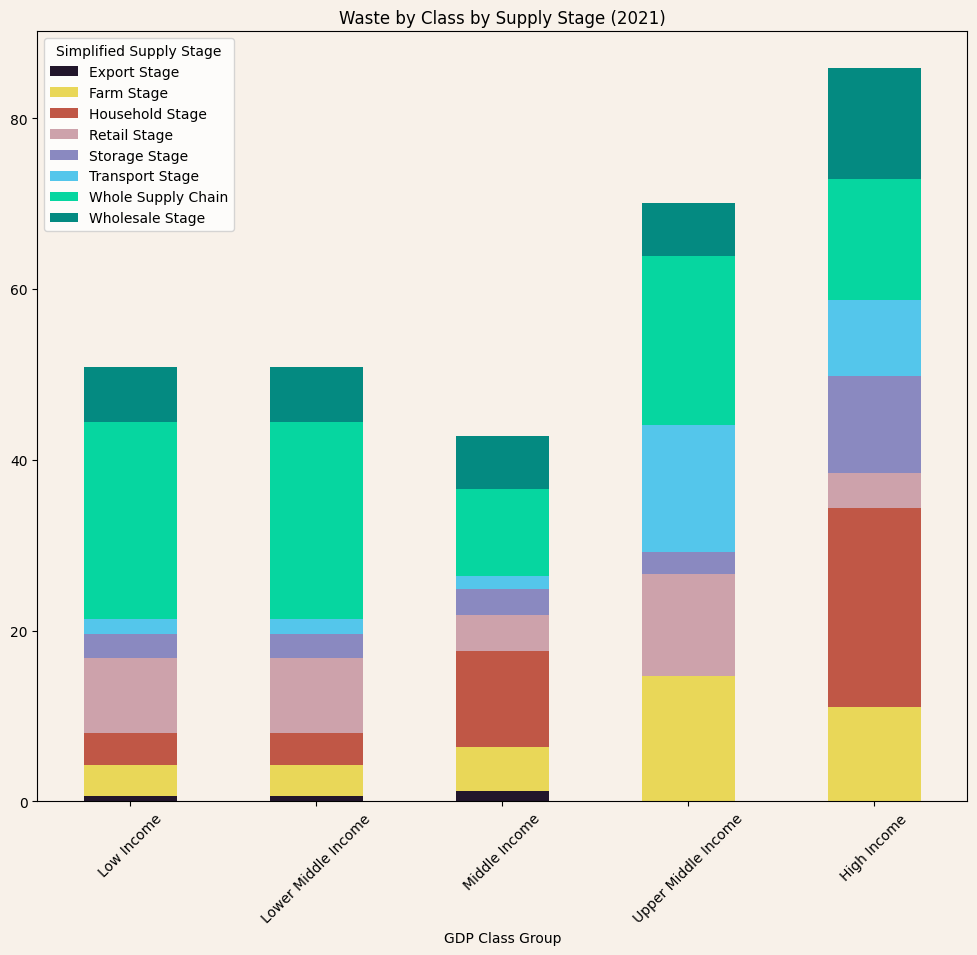

In [42]:
# Define your custom color palette
custom_colors = ['#22162B', '#E9D758', '#C05746', '#CDA2AB', '#8A89C0', '#54C6EB', '#06D6A0', '#048A81']
# Assuming loss_per_stage_df is your DataFrame
ax = loss_per_stage_df.plot(kind='bar', stacked=True, figsize=(12, 10), color=custom_colors)
plt.title('Waste by Class by Supply Stage (2021)')
plt.xticks(rotation=45)
plt.xlabel("GDP Class Group")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/waste_by_class_stage_2011-21.png")
plt.show()

In [43]:
# make a dataframe just for US data
usa_df = food_loss_clean[food_loss_clean["country"] == "United States of America"]
usa_df.head()

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
23107,840,United States of America,NaN,Asparagus,2019,9.0,9,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23108,840,United States of America,NaN,Cabbages,2019,7.0,7,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23109,840,United States of America,NaN,Cabbages,2019,8.0,8,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23110,840,United States of America,NaN,Cabbages,2019,12.0,12,NaN,NaN,NaN,Whole supply chain,NaN,NaN
23111,840,United States of America,NaN,Cabbages,2019,12.0,12,NaN,NaN,NaN,Whole supply chain,NaN,NaN


In [44]:
# find waste percentage by commodity in the USA
commodity_waste = usa_df.groupby("commodity")["loss_percentage"].mean()
commodity_waste

commodity
Apple juice                                26.666700
Apples                                      5.437500
Apricots                                   11.323214
Artichokes                                  8.229630
Asparagus                                  10.028571
                                             ...    
Sweet potatoes                             10.743396
Tangerines, mandarins, clementines          5.594231
Tomatoes                                   15.220370
Vegetable products, fresh or dry n.e.c.    10.500000
Watermelons                                10.981132
Name: loss_percentage, Length: 80, dtype: float64

In [45]:
low_loss_per_year = pd.DataFrame(low_loss_per_year)
low_loss_per_year.reset_index(inplace = True)
low_loss_per_year = low_loss_per_year[low_loss_per_year['year'] >= 1990]

In [46]:
low_middle_loss_per_year = pd.DataFrame(low_middle_loss_per_year)
low_middle_loss_per_year.reset_index(inplace = True)
low_middle_loss_per_year = low_middle_loss_per_year[low_middle_loss_per_year['year'] >= 1990]

In [47]:
middle_loss_per_year = pd.DataFrame(middle_loss_per_year)
middle_loss_per_year.reset_index(inplace = True)
middle_loss_per_year = middle_loss_per_year[middle_loss_per_year['year'] >= 1990]

In [48]:
upper_middle_loss_per_year = pd.DataFrame(upper_middle_loss_per_year)
upper_middle_loss_per_year.reset_index(inplace = True)
upper_middle_loss_per_year = upper_middle_loss_per_year[upper_middle_loss_per_year['year'] >= 1990]

In [49]:
high_loss_per_year = pd.DataFrame(high_loss_per_year)
high_loss_per_year.reset_index(inplace = True)
high_loss_per_year = high_loss_per_year[high_loss_per_year['year'] >= 1990]

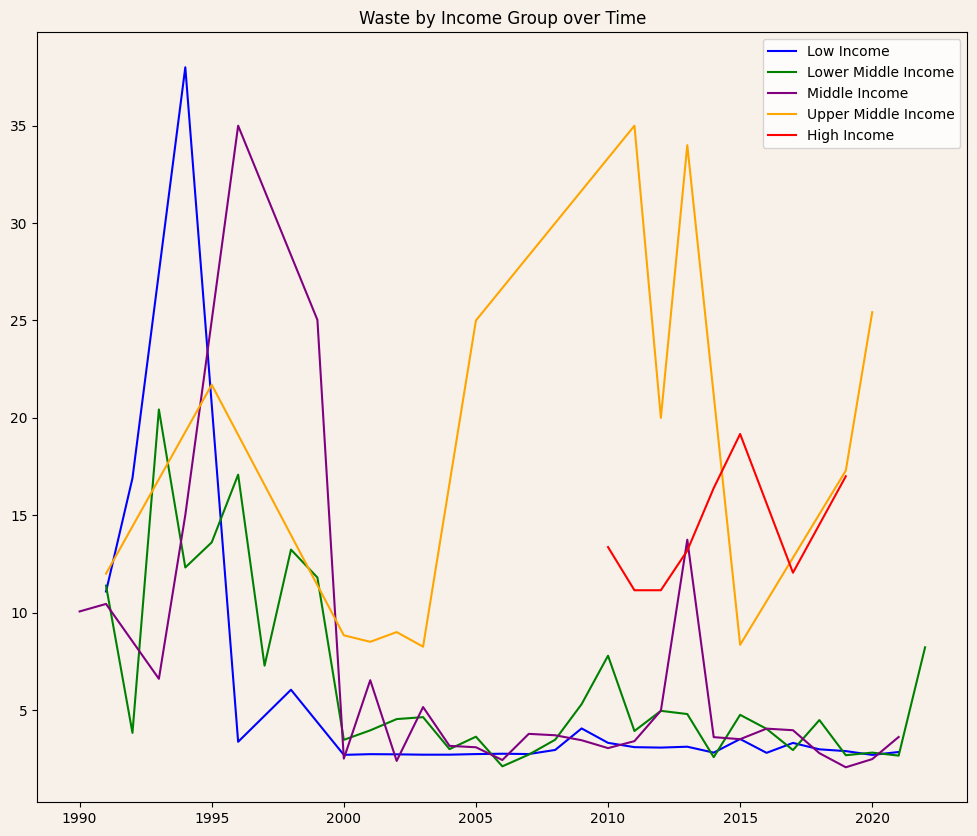

In [50]:
#line graph for waste by income level by year
plt.figure(figsize=(12, 10))
# Plot our line that will be used to track the first country's traveling companion percentage over the years
plt.plot(low_loss_per_year["year"], low_loss_per_year["loss_percentage"], color="blue", label="Low Income")
plt.plot(low_middle_loss_per_year["year"], low_middle_loss_per_year["loss_percentage"], color="green", label="Lower Middle Income")
plt.plot(middle_loss_per_year["year"], middle_loss_per_year["loss_percentage"], color="purple", label="Middle Income")
plt.plot(upper_middle_loss_per_year["year"], upper_middle_loss_per_year["loss_percentage"], color="orange", label="Upper Middle Income")
plt.plot(high_loss_per_year["year"], high_loss_per_year["loss_percentage"], color="red", label="High Income")
plt.legend()
plt.title("Waste by Income Group over Time")

# Change the background color
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

# Save the figure
plt.savefig("Visualizations/waste_by_class_over_time.png")

# Print our chart to the screen
plt.show()

In [51]:
top_countries = food_loss_clean.sort_values('loss_percentage', ascending = False)
top_countries

,m49_code,country,region,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity1,activity2,food_supply_stage,treatment,cause_of_loss
10362,410,Republic of Korea,NaN,Strawberries,2001,65.000000,65%,NaN,Transportation,NaN,Transport,Ambient conditions during transportation,NaN
15745,566,Nigeria,NaN,"Cow peas, dry",1974,65.000000,60-70,NaN,NaN,NaN,Storage,NaN,NaN
8639,36,Australia,NaN,Cauliflowers and broccoli,2013,65.000000,65%,NaN,Processing,NaN,Processing,Broccoli,NaN
23863,840,United States of America,NaN,Papayas,2008,64.000000,64%,NaN,Consumption,Retailing,Households,NaN,NaN
22744,834,United Republic of Tanzania,"Chalinze, Lugoba and Kiwangwa","Mangoes, guavas and mangosteens",2013,63.000000,63,NaN,NaN,NaN,Trader,NaN,Rotting
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,454,Malawi,NaN,Sorghum,2020,0.002013,0.0020129,NaN,Storage,NaN,Farm,NaN,NaN
11162,454,Malawi,NaN,Sorghum,2019,0.001915,0.00191458,NaN,Storage,NaN,Farm,NaN,NaN
11228,454,Malawi,NaN,Sorghum,2017,0.001857,0.00185738,NaN,Storage,NaN,Farm,NaN,NaN
11090,454,Malawi,NaN,Sorghum,2021,0.001161,0.00116092,NaN,Storage,NaN,Farm,NaN,NaN
